In [237]:
import pandas as pd
data = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']], 
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])
data

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리중


In [238]:
# 열 이름
data.columns

Index(['나이', '성별', '학교'], dtype='object')

In [239]:
# 행 인덱스
data.index

Index(['준서', '예은'], dtype='object')

In [240]:
import pandas as pd
filename = r'C:\\sqlite\\mysql\\code\\08_1\\file2\\weather.xlsx'
df = pd.read_excel(filename, engine='openpyxl')
df

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4
...,...,...,...,...,...,...,...
738,400,강남,2021-01-31 19:00:00,7.4,0.6,0.0,51.0
739,400,강남,2021-01-31 20:00:00,6.5,1.0,0.0,59.4
740,400,강남,2021-01-31 21:00:00,7.7,1.0,0.0,60.3
741,400,강남,2021-01-31 22:00:00,6.8,0.6,0.0,63.7


In [241]:
df.drop(['지점','지점명'],axis=1, inplace=True)

In [242]:
df.columns=['date','temp','wind','rain','humid']

In [243]:
df['rain']=df['rain'].replace([0], 0.01)
df['rain'].value_counts()

rain
0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: count, dtype: int64

In [244]:
df['rain'].value_counts()

rain
0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: count, dtype: int64

In [245]:
# dust weather 병합 shape 속성

In [246]:
import pandas as pd
file = r'C:\\sqlite\\mysql\\code\\08_1\\file2\\dust.xlsx'
df2 = pd.read_excel(file, engine='openpyxl')

In [247]:
df2.rename(columns={'날짜':'date', '아황산가스':'SO2','일산화탄소':'CO', '오존':'O3','이산화질소':'NO2'},inplace=True) # inplace 원본수정허용
df2

,date,SO2,CO,O3,NO2,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0
...,...,...,...,...,...,...,...
739,2021-01-31 20,0.004,0.7,0.002,0.057,45.0,23.0
740,2021-01-31 21,0.004,0.8,0.001,0.059,48.0,27.0
741,2021-01-31 22,0.003,1.0,0.001,0.061,46.0,26.0
742,2021-01-31 23,0.003,0.6,0.006,0.049,45.0,24.0


In [248]:
df2['date'] = df2['date'].str[:10]
df2.head()

,date,SO2,CO,O3,NO2,PM10,PM2.5
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,0.004,0.5,0.010,0.026,NaN,14.0


In [249]:
df2['date'] = pd.to_datetime(df2['date'])
df2.dtypes

date     datetime64[ns]
SO2             float64
CO              float64
O3              float64
NO2             float64
PM10            float64
PM2.5           float64
dtype: object

In [250]:
df2['year'] = df2['date'].dt.year #연도
df2['month'] = df2['date'].dt.month #월
df2['day'] = df2['date'].dt.day #일

In [251]:
df2 = df2[['date', 'year', 'month', 'day', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5']]

In [252]:
df2.drop(index=743, inplace=True)
df2.shape
# df2.info()

C:\Users\admin\AppData\Local\Temp\ipykernel_7564\3608979001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(index=743, inplace=True)


(743, 10)

In [253]:
df2 = df2.fillna(method = 'pad')
df2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_7564\2678051956.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2 = df2.fillna(method = 'pad')


,date,year,month,day,SO2,CO,O3,NO2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [254]:
df2.fillna(20, inplace=True)
df2.head()

,date,year,month,day,SO2,CO,O3,NO2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [255]:
df.shape

(743, 5)

In [256]:
# result1 = pd.concat([df2,df],axis=1)
result1=pd.merge(df2,df,on='date')
result1.head()

,date,year,month,day,SO2,CO,O3,NO2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-02,2021,1,2,0.004,0.4,0.027,0.012,19.0,16.0,-2.0,1.7,0.01,40.7
1,2021-01-02,2021,1,2,0.004,0.4,0.026,0.013,14.0,8.0,-2.0,1.7,0.01,40.7
2,2021-01-02,2021,1,2,0.004,0.4,0.023,0.017,29.0,13.0,-2.0,1.7,0.01,40.7
3,2021-01-02,2021,1,2,0.003,0.4,0.026,0.013,24.0,13.0,-2.0,1.7,0.01,40.7
4,2021-01-02,2021,1,2,0.004,0.4,0.028,0.010,18.0,9.0,-2.0,1.7,0.01,40.7


In [257]:
result1.corr(method='pearson')

,date,year,month,day,SO2,CO,O3,NO2,PM10,PM2.5,temp,wind,rain,humid
date,1.000000,NaN,NaN,1.000000,-0.307947,0.222592,-0.121581,0.203132,-0.015867,0.026533,0.464584,-0.101991,NaN,0.228621
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.000000,NaN,NaN,1.000000,-0.307947,0.222592,-0.121581,0.203132,-0.015867,0.026533,0.464584,-0.101991,NaN,0.228621
SO2,-0.307947,NaN,NaN,-0.307947,1.000000,0.148276,-0.072666,0.091891,0.171688,0.156264,-0.461918,0.020817,NaN,-0.183347
CO,0.222592,NaN,NaN,0.222592,0.148276,1.000000,-0.756154,0.841088,0.530722,0.694054,0.237092,-0.437012,NaN,0.258817
O3,-0.121581,NaN,NaN,-0.121581,-0.072666,-0.756154,1.000000,-0.925406,-0.353075,-0.530207,-0.087188,0.404506,NaN,-0.156777
NO2,0.203132,NaN,NaN,0.203132,0.091891,0.841088,-0.925406,1.000000,0.420847,0.566678,0.184235,-0.457444,NaN,0.169406
PM10,-0.015867,NaN,NaN,-0.015867,0.171688,0.530722,-0.353075,0.420847,1.000000,0.824129,0.120553,-0.239832,NaN,0.211452
PM2.5,0.026533,NaN,NaN,0.026533,0.156264,0.694054,-0.530207,0.566678,0.824129,1.000000,0.130186,-0.366732,NaN,0.295873


In [258]:
corr = result1.corr()
# corr
corr['PM10'] = corr['PM10'].sort_values(ascending=False)

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>, <Axes: title={'center': 'SO2'}>,
        <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'O3'}>, <Axes: title={'center': 'NO2'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'PM2.5'}>, <Axes: >, <Axes: >]],
      dtype=object)

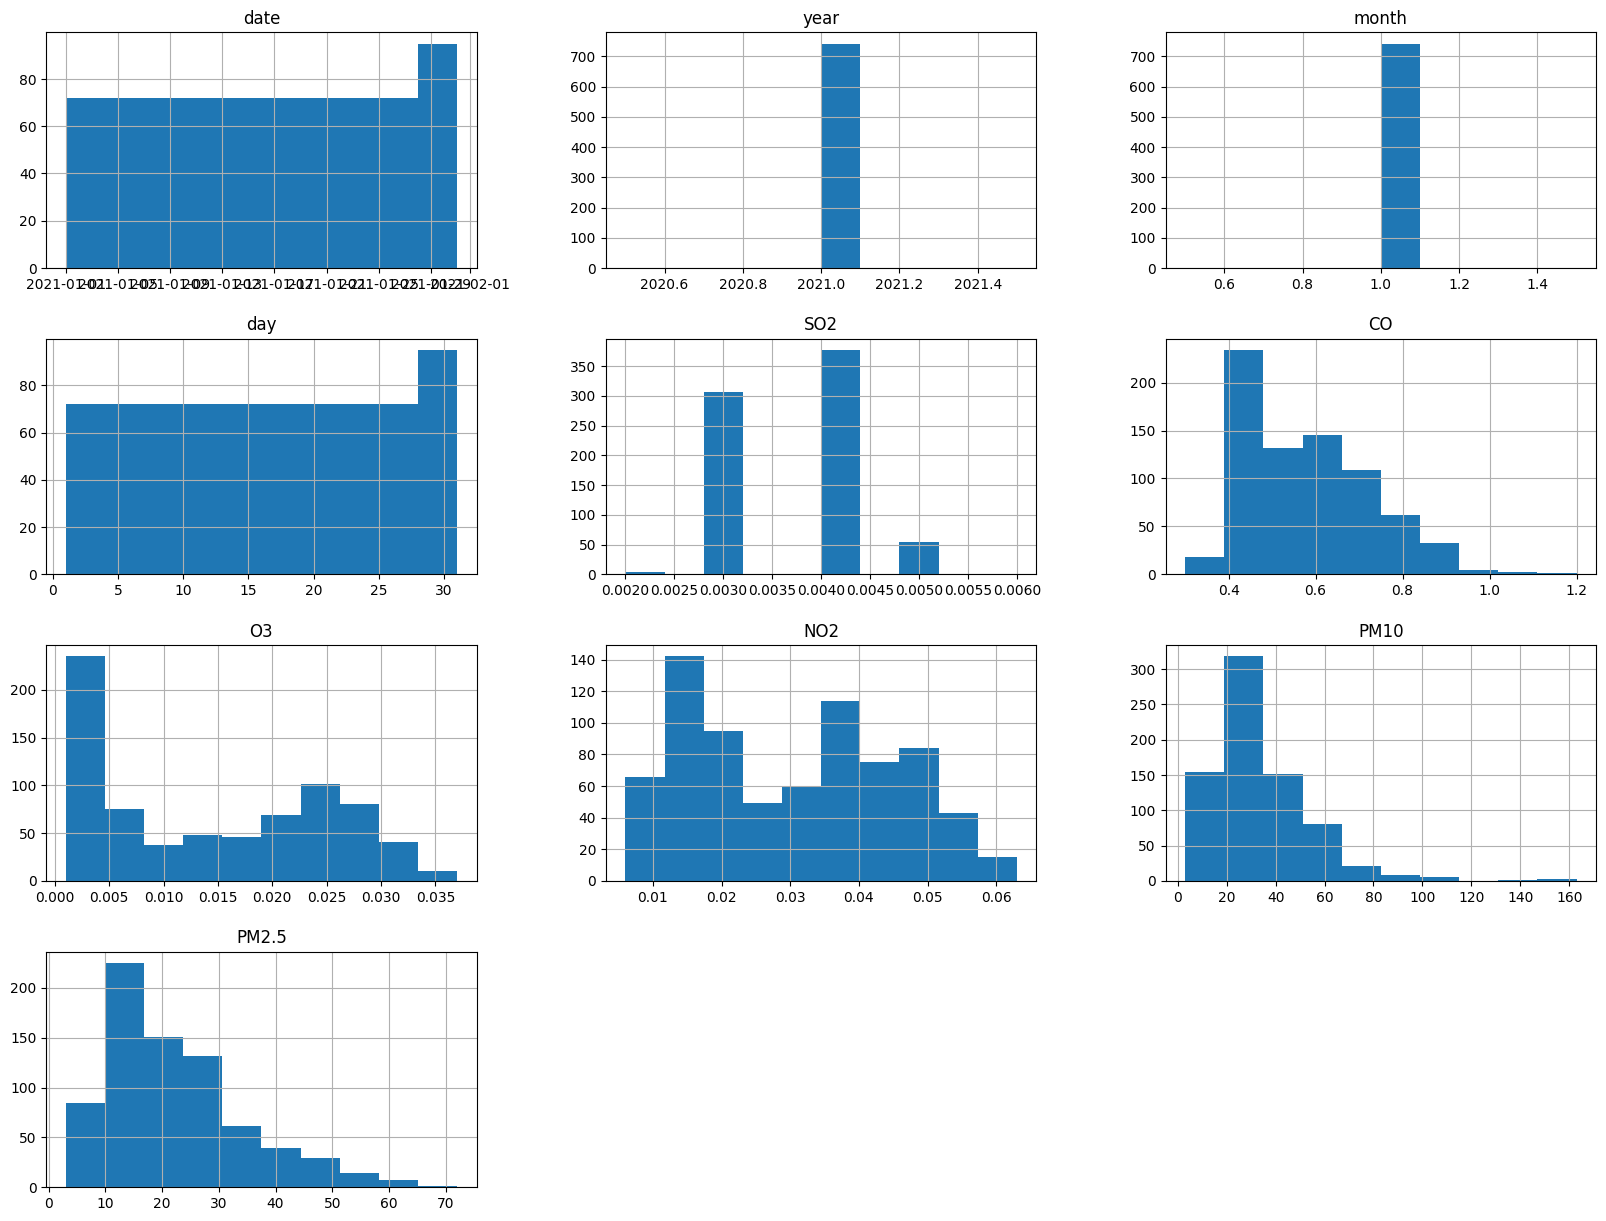

In [259]:
import matplotlib.pyplot as plt

df2.hist(figsize=(20, 15))

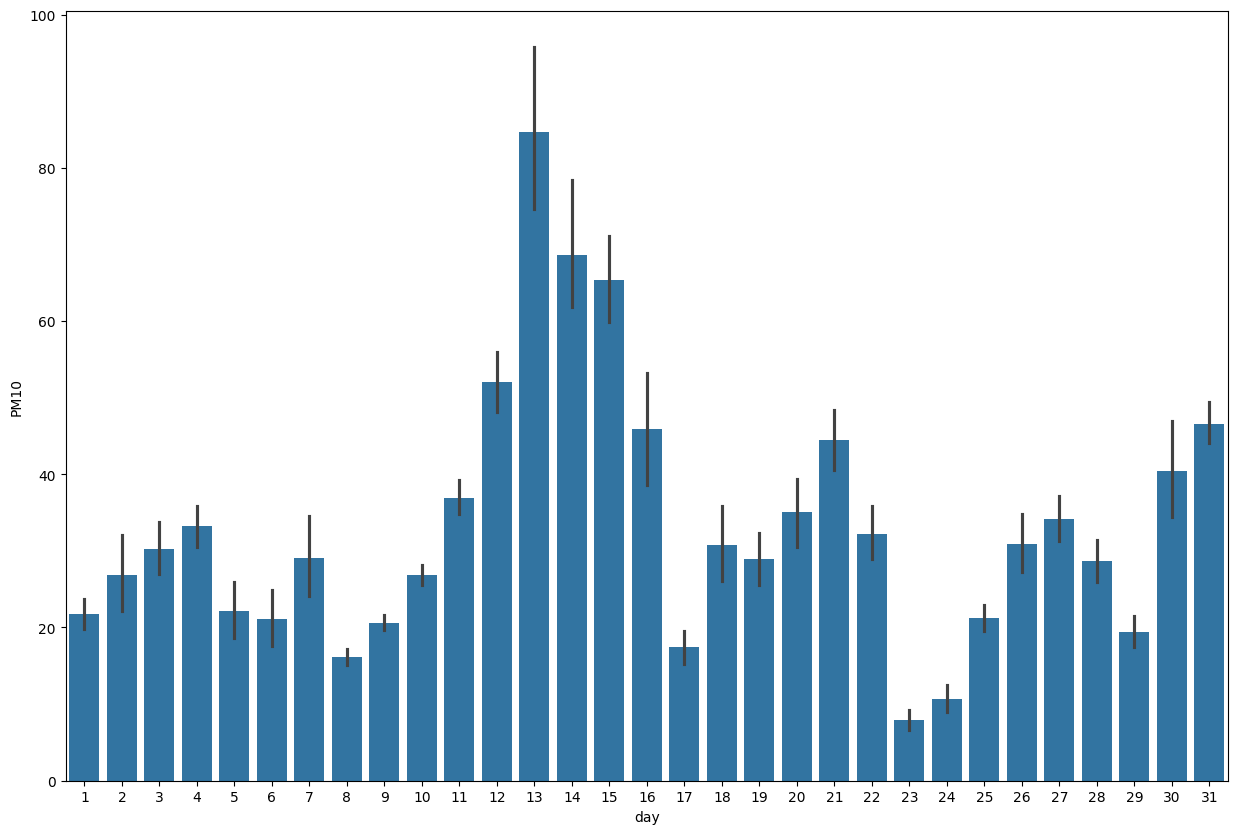

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
dayGraph = sns.barplot(x='day', y='PM10', data=df2)
plt.xticks(rotation=0)
plt.show()

<Axes: >

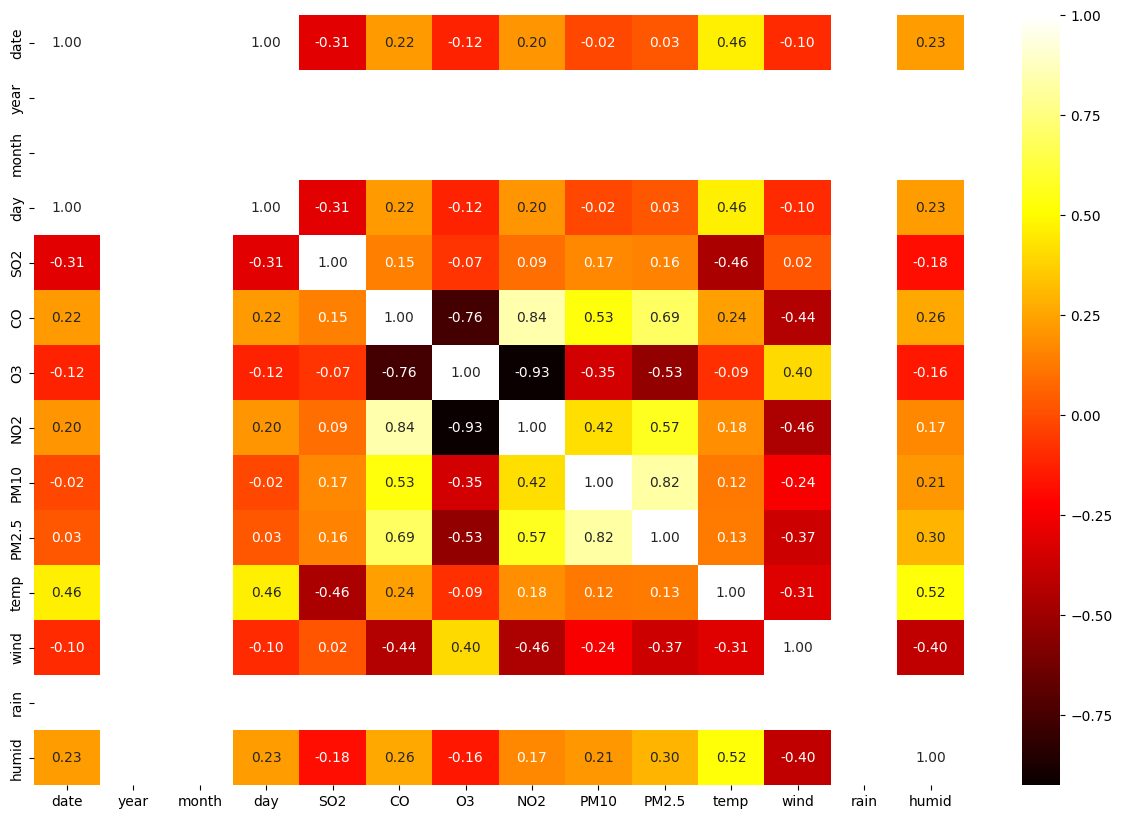

In [261]:
# 히트맵 그래프로 시각화: 각 변수간의 상관관계를 히트맵으로 출력
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr, annot=True, fmt='.2f', cmap='hot')

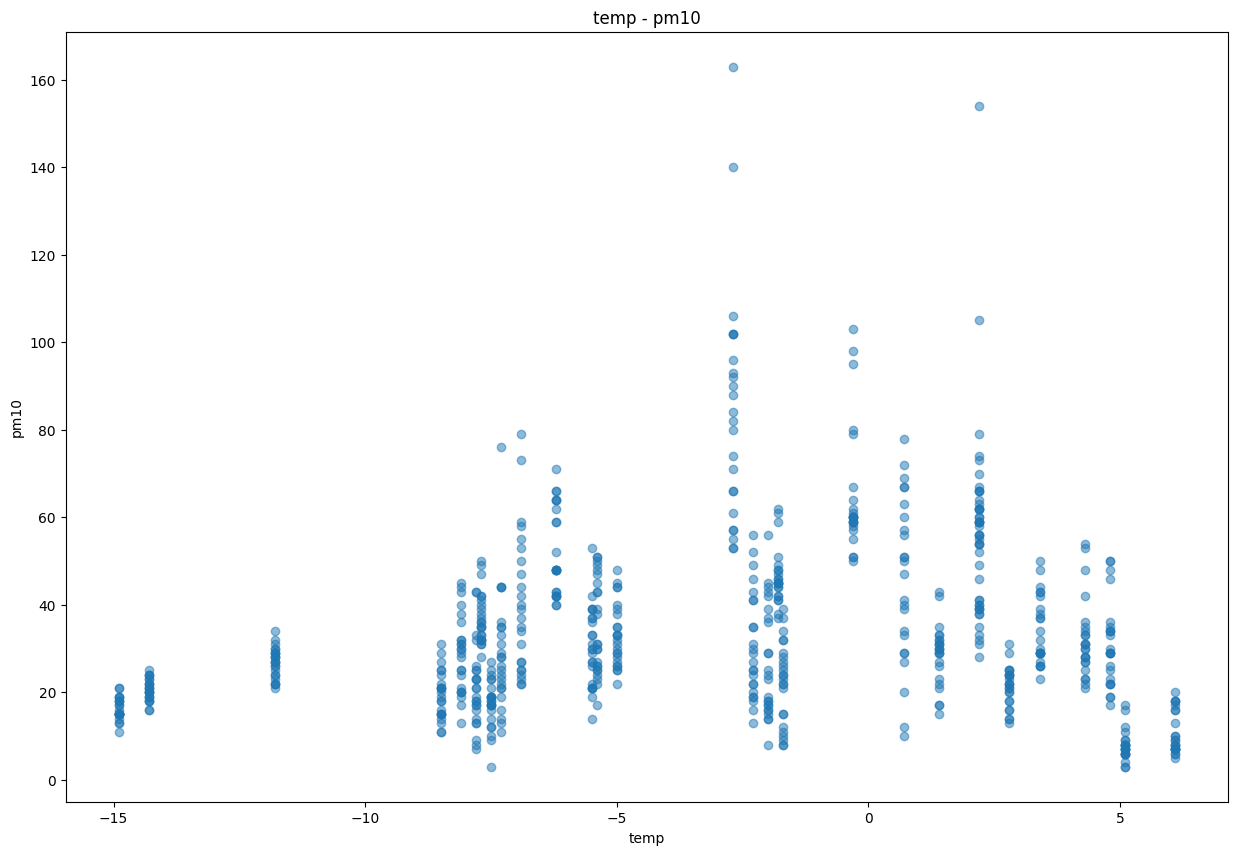

In [262]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
x=result1['temp'] #온도
y=result1['PM10'] #미세먼지
plt.plot(x,y,marker='o',linestyle='none',alpha=0.5)
plt.title('temp - pm10')
plt.xlabel('temp')
plt.ylabel('pm10')
plt.show()